In [1]:
import numpy as np
import pandas as pd
import scipy as sci
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
import warnings
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 300

### 1) Data Processing

In [2]:
sale = pd.read_pickle('sale_no_re.pkl')

In [3]:
sample = sale.loc[sale['Style_Color'].isin(['DTA4E2531JET','DTA4E2531IV','DTA4E2531GRY', 'DTAN1190PJA'])]

In [4]:
sample

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue
23884,DTA4E2531,GRY,wire tassel hook er,AAG001,2018-08-10,12,3.75,$ 45.00,NaN,IMPORT,NOBLES,MS,39047,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,8,DTA4E2531GRY,45.00
23885,DTA4E2531,GRY,wire tassel hook er,ACC012,2018-05-25,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,TX,77036,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,5,DTA4E2531GRY,42.00
23886,DTA4E2531,GRY,wire tassel hook er,ACC019,2017-07-27,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,TX,77036,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2017,7,DTA4E2531GRY,42.00
23887,DTA4E2531,GRY,wire tassel hook er,ACC019,2017-12-15,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,TX,77036,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2017,12,DTA4E2531GRY,42.00
23888,DTA4E2531,GRY,wire tassel hook er,ACC019,2018-01-30,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,TX,77036,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,1,DTA4E2531GRY,42.00
23889,DTA4E2531,GRY,wire tassel hook er,ACE002,2018-10-03,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,IL,60640,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,10,DTA4E2531GRY,42.00
23890,DTA4E2531,GRY,wire tassel hook er,ALE003,2017-12-28,72,3.50,$ 252.00,NaN,IMPORT,NOBLES,MS,39157,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2017,12,DTA4E2531GRY,252.00
23891,DTA4E2531,GRY,wire tassel hook er,ALT001,2017-09-22,732,3.65,"$ 2,671.80",NaN,IMPORT,NOBLES,TN,37801,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2017,9,DTA4E2531GRY,2671.80
23892,DTA4E2531,GRY,wire tassel hook er,AND003,2018-01-10,24,3.50,$ 84.00,NaN,IMPORT,NOBLES,CA,90021,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,1,DTA4E2531GRY,84.00
23893,DTA4E2531,GRY,wire tassel hook er,AND003,2018-07-06,12,3.50,$ 42.00,NaN,IMPORT,NOBLES,CA,90021,2018,2018 2ND,FW18,10/2/18,7/10/17,10/3/18,7/10/17,"[wire, tassel, hook, er]",EarRings,wire tassel hook er,wired,2018,7,DTA4E2531GRY,42.00


In [5]:
sample_period = pd.DataFrame(sample.groupby(['INVC DATE', 'Style_Color'])['QTY'].sum()).reset_index()

In [6]:
sample_period

,INVC DATE,Style_Color,QTY
0,2016-01-05,DTAN1190PJA,36
1,2016-01-26,DTAN1190PJA,36
2,2016-02-03,DTAN1190PJA,12
3,2016-03-07,DTAN1190PJA,60
4,2016-03-23,DTAN1190PJA,12
5,2016-03-25,DTAN1190PJA,24
6,2016-03-29,DTAN1190PJA,60
7,2016-03-30,DTAN1190PJA,96
8,2016-04-06,DTAN1190PJA,72
9,2016-04-29,DTAN1190PJA,48


In [7]:
sample_period.describe()

,QTY
count,427.000000
mean,50.262295
std,67.199245
min,8.000000
25%,12.000000
50%,36.000000
75%,60.000000
max,828.000000


### 2) EDA Time Series

In [8]:
sample_period = sample_period.rename(columns={'INVC DATE': 'INVCDATE'})

In [9]:
sample_period['QTY'] = sample_period['QTY'].apply(lambda x: int(x))

In [10]:
sample_period = sample_period.set_index('INVCDATE')

In [11]:
sample_period

,Style_Color,QTY
INVCDATE,,
2016-01-05,DTAN1190PJA,36
2016-01-26,DTAN1190PJA,36
2016-02-03,DTAN1190PJA,12
2016-03-07,DTAN1190PJA,60
2016-03-23,DTAN1190PJA,12
2016-03-25,DTAN1190PJA,24
2016-03-29,DTAN1190PJA,60
2016-03-30,DTAN1190PJA,96
2016-04-06,DTAN1190PJA,72


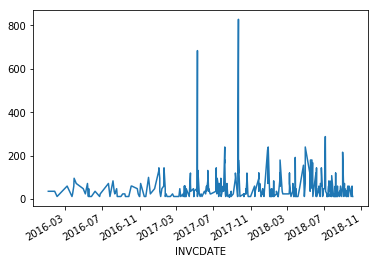

In [12]:
sample_period['QTY'].plot()
plt.rcParams['figure.figsize']=(20,5)

#### The above curve shows that the quantity ordered through time are non-stationary. Therefore, ARIMA model will be needed.

### 3) Pre-Processing the sample data

In [13]:
sample_period

,Style_Color,QTY
INVCDATE,,
2016-01-05,DTAN1190PJA,36
2016-01-26,DTAN1190PJA,36
2016-02-03,DTAN1190PJA,12
2016-03-07,DTAN1190PJA,60
2016-03-23,DTAN1190PJA,12
2016-03-25,DTAN1190PJA,24
2016-03-29,DTAN1190PJA,60
2016-03-30,DTAN1190PJA,96
2016-04-06,DTAN1190PJA,72


In [14]:
sample_period2 = sample_period[['Style_Color','QTY']].pivot(columns = 'Style_Color', values = 'QTY')

In [15]:
sample_period2

Style_Color,DTA4E2531GRY,DTA4E2531IV,DTA4E2531JET,DTAN1190PJA
INVCDATE,,,,
2016-01-05,NaN,NaN,NaN,36.0
2016-01-26,NaN,NaN,NaN,36.0
2016-02-03,NaN,NaN,NaN,12.0
2016-03-07,NaN,NaN,NaN,60.0
2016-03-23,NaN,NaN,NaN,12.0
2016-03-25,NaN,NaN,NaN,24.0
2016-03-29,NaN,NaN,NaN,60.0
2016-03-30,NaN,NaN,NaN,96.0
2016-04-06,NaN,NaN,NaN,72.0


In [120]:
sample_period2 = sample_period2.fillna(1)

In [121]:
sample_period2

Style_Color,DTA4E2531GRY,DTA4E2531IV,DTA4E2531JET,DTAN1190PJA
INVCDATE,,,,
2016-01-05,1.0,1.0,1.0,36.0
2016-01-26,1.0,1.0,1.0,36.0
2016-02-03,1.0,1.0,1.0,12.0
2016-03-07,1.0,1.0,1.0,60.0
2016-03-23,1.0,1.0,1.0,12.0
2016-03-25,1.0,1.0,1.0,24.0
2016-03-29,1.0,1.0,1.0,60.0
2016-03-30,1.0,1.0,1.0,96.0
2016-04-06,1.0,1.0,1.0,72.0


In [122]:
ret_var = np.log(sample_period2).diff().iloc[1:]

In [123]:
ret_var = ret_var.fillna(method = 'pad')

In [124]:
ret_var

Style_Color,DTA4E2531GRY,DTA4E2531IV,DTA4E2531JET,DTAN1190PJA
INVCDATE,,,,
2016-01-26,0.000000,0.000000,0.000000,0.000000
2016-02-03,0.000000,0.000000,0.000000,-1.098612
2016-03-07,0.000000,0.000000,0.000000,1.609438
2016-03-23,0.000000,0.000000,0.000000,-1.609438
2016-03-25,0.000000,0.000000,0.000000,0.693147
2016-03-29,0.000000,0.000000,0.000000,0.916291
2016-03-30,0.000000,0.000000,0.000000,0.470004
2016-04-06,0.000000,0.000000,0.000000,-0.287682
2016-04-29,0.000000,0.000000,0.000000,-0.405465


In [125]:
ret_train  = ret_var.copy()
ret_train.index = pd.to_datetime(ret_train.index)
ret_train.head()

Style_Color,DTA4E2531GRY,DTA4E2531IV,DTA4E2531JET,DTAN1190PJA
INVCDATE,,,,
2016-01-26,0.0,0.0,0.0,0.000000
2016-02-03,0.0,0.0,0.0,-1.098612
2016-03-07,0.0,0.0,0.0,1.609438
2016-03-23,0.0,0.0,0.0,-1.609438
2016-03-25,0.0,0.0,0.0,0.693147


In [126]:
#ret_train = ret_train.fillna(0)
ret_train.index = pd.to_datetime(ret_train.index)

### 3-1) Aggregating into week

In [127]:
useGrouper = True
if useGrouper:
        grouper    = pd.Grouper(freq='W-FRI')
        ret_train2 = ret_train.groupby(grouper).sum()
        ret_train2.head()
else:
        ret_train['week'] = ret_train.index.year * 52 + np.clip(ret_train.index.week, 0, 52.5)
        if 'Date' not in ret_train.columns: ret_train.reset_index(inplace=True)
        ret_train2 = ret_train.groupby('week').sum()
        ret_train2['week'] = ret_train.groupby('week').last()['Date']
        ret_train2 = ret_train2.set_index('week')
        print(ret_train2.head())

### 3-2) Create a prediction window (TRAIN/TEST Split)

In [128]:
train_window = ret_train2.shape[0] - 10  # Use the full data set except the last 10 weeks
ret_train2.index.rename('Week',inplace=True)
ret_train3 = ret_train2.iloc[:train_window]

### 4) Modeling VARMAX/Vector AutoRegressive Model AKA --> ARMA

In [129]:
code_x = ['DTA4E2531JET','DTA4E2531IV','DTA4E2531GRY','DTAN1190PJA']

In [130]:
model = VAR(ret_train3[code_x], dates=ret_train3.index)

In [131]:
import warnings
with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            ans = model.fit(2, ic = 'aic') 

In [132]:
ans.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 08, Dec, 2018
Time:                     02:27:51
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    3.94744
Nobs:                     129.000    HQIC:                   3.47363
Log likelihood:          -899.305    FPE:                    23.3421
AIC:                      3.14935    Det(Omega_mle):         17.8231
--------------------------------------------------------------------
Results for equation DTA4E2531JET
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.052990         0.170227            0.311           0.756
L1.DTA4E2531JET        -0.356178         0.119588           -2.978           0.003
L1.DTA4E2531IV         -0.083948         0.12

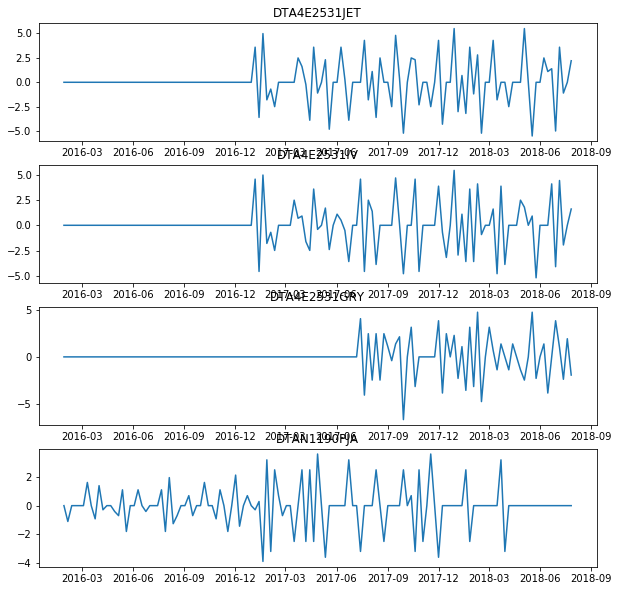

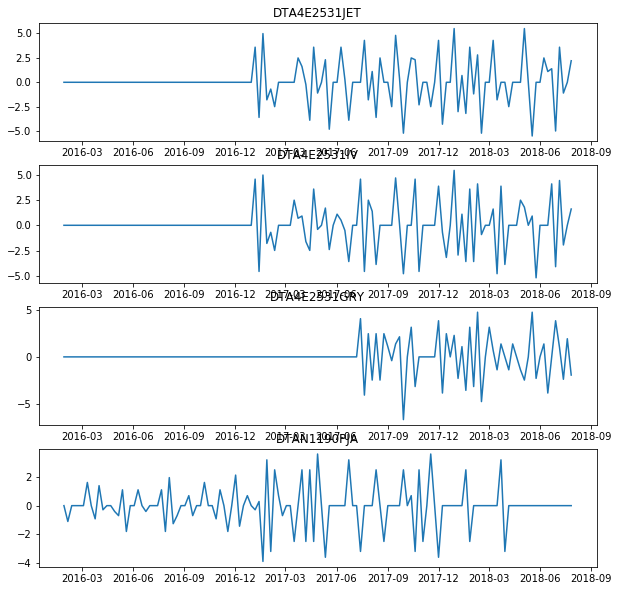

In [133]:
ans.plot()

### 5) Impulse Response Analysis

In [134]:
irf = ans.irf(5)

### 5.1) Impulse Correlation of Time Series

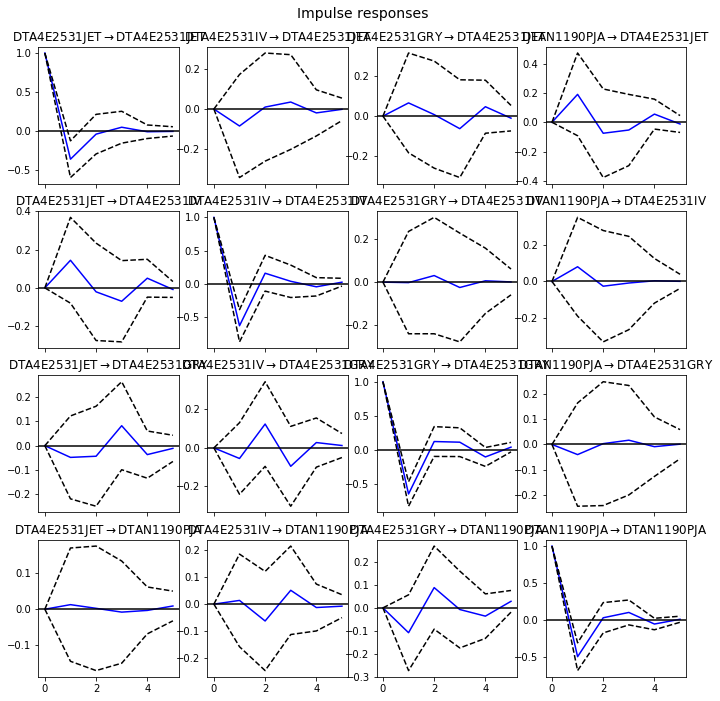

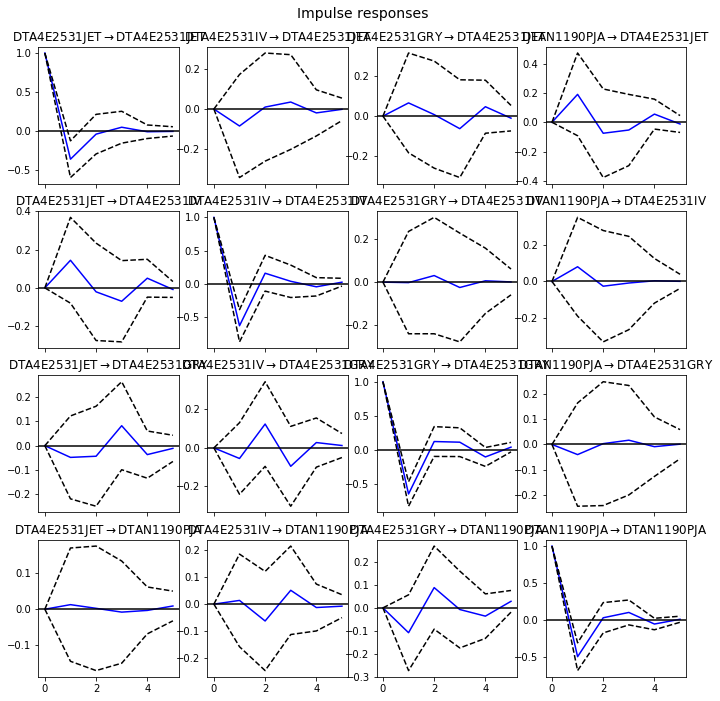

In [135]:
irf.plot()

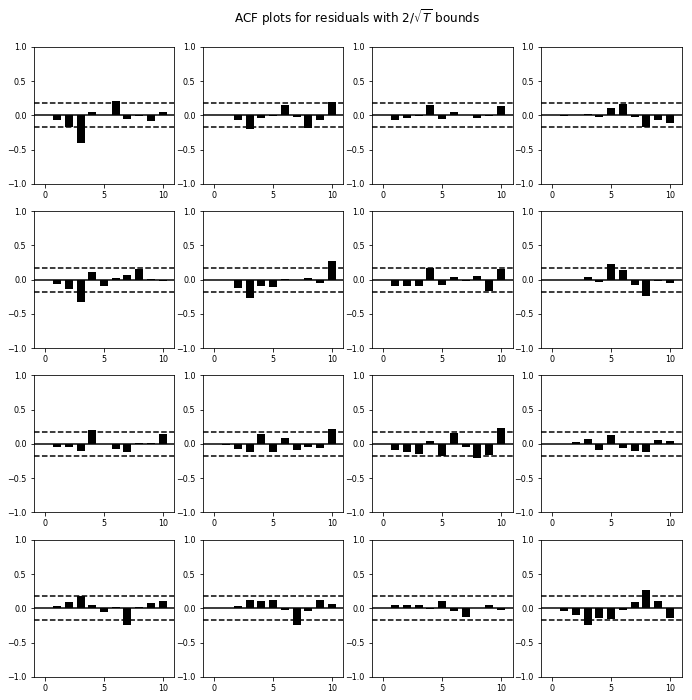

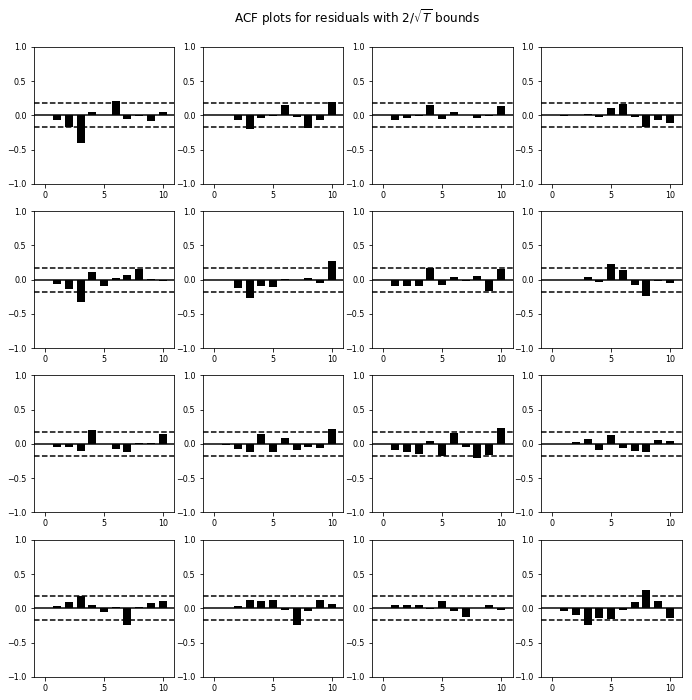

In [136]:
ans.plot_acorr()

#### 5.2) Model Selection 

In [137]:
with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            model.select_order(10)

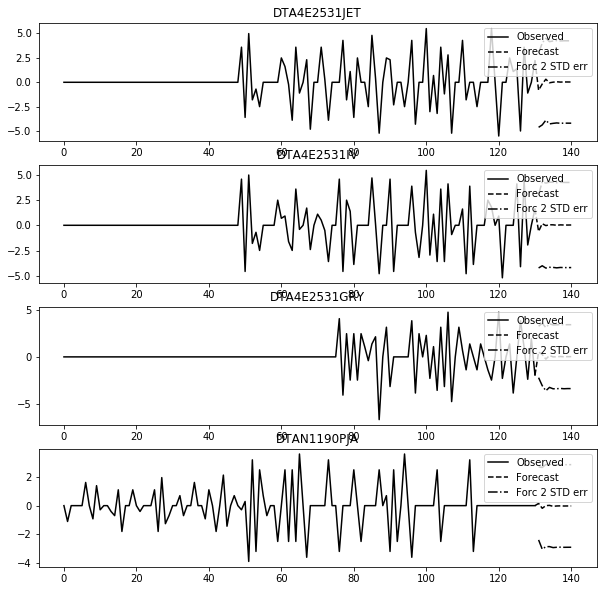

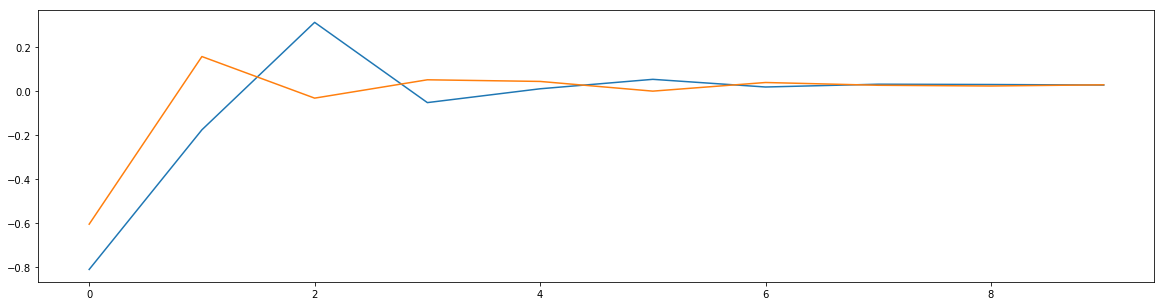

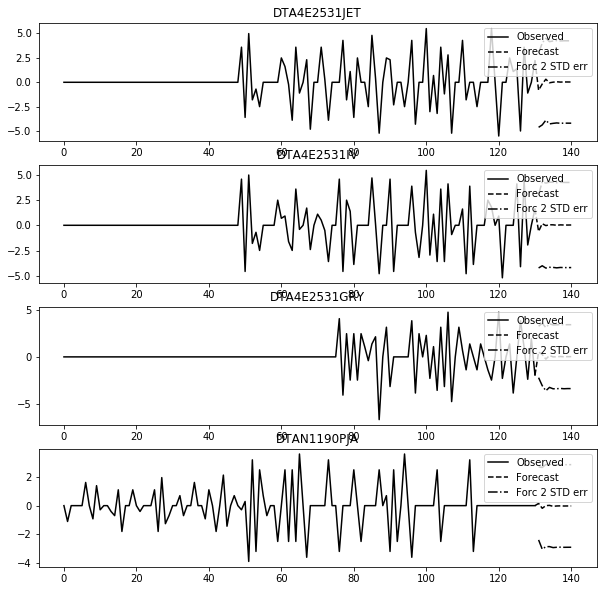

In [138]:
lag_order = ans.k_ar
f_values = ans.forecast(ret_train3[code_x].values[-lag_order:,:], 10)
f_values.shape
plt.plot(np.arange(10), f_values[:,0])
plt.plot(np.arange(10), f_values[:,1])
ans.plot_forecast(10)

### 6) Training ARIMA

In [139]:
useExog = True
endo_tickers = ['DTA4E2531JET','DTA4E2531IV']
exog_tickers = ['DTA4E2531GRY','DTAN1190PJA']
endo = ret_train3[endo_tickers]
exog = ret_train3[exog_tickers] #if useExog else None
varmax  = VARMAX(endo, exog = exog, order=(1,0), start_params=None)

In [140]:
with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            result = varmax.fit(maxiter=1000)

In [141]:
warnings.filterwarnings('ignore', module='statsmodels')
result.summary()

Dep. Variable:,"['DTA4E2531JET', 'DTA4E2531IV']",No. Observations:,131
Model:,VARX(1),Log Likelihood,-496.296
,+ intercept,AIC,1018.593
Date:,"Sat, 08 Dec 2018",BIC,1055.970
Time:,02:28:40,HQIC,1033.781
Sample:,01-29-2016,,
,- 07-27-2018,,
Covariance Type:,opg,,
Ljung-Box (Q):,"95.65, 46.40",Jarque-Bera (JB):,"12.03, 37.06"
Prob(Q):,"0.00, 0.23",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"416.92, 9032.19",Skew:,"0.15, 0.18"


In [143]:
fitted_values = result.predict()   # in-sample prediction
fitted_values

,DTA4E2531JET,DTA4E2531IV
Week,,
2016-01-29,0.033122,0.029226
2016-02-05,0.044616,0.041384
2016-02-12,-0.106575,-0.035341
2016-02-19,0.044616,0.041384
2016-02-26,0.044616,0.041384
2016-03-04,0.044616,0.041384
2016-03-11,0.044616,0.041384
2016-03-18,0.266107,0.153783
2016-03-25,0.044616,0.041384


In [117]:
sample_period2

Style_Color,DTA4E2531GRY,DTA4E2531IV,DTA4E2531JET,DTAN1190PJA
INVCDATE,,,,
2016-01-05,NaN,NaN,NaN,36.0
2016-01-26,NaN,NaN,NaN,36.0
2016-02-03,NaN,NaN,NaN,12.0
2016-03-07,NaN,NaN,NaN,60.0
2016-03-23,NaN,NaN,NaN,12.0
2016-03-25,NaN,NaN,NaN,24.0
2016-03-29,NaN,NaN,NaN,60.0
2016-03-30,NaN,NaN,NaN,96.0
2016-04-06,NaN,NaN,NaN,72.0


In [109]:
train_window = 250
order = (1, 0)
useExog = True
exog  = ret_train2[exog_tickers].iloc[:train_window] if useExog else None
endog = ret_train2[endo_tickers].iloc[:train_window]    
varmax = VARMAX(endog=endog, order=order, exog = exog)
with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            res2  = varmax.fit(maxiter=1000)

In [110]:
endog

Style_Color,DTA4E2531JET,DTA4E2531IV
Week,,
2016-01-29,0.000000,0.000000
2016-02-05,0.000000,0.000000
2016-02-12,0.000000,0.000000
2016-02-19,0.000000,0.000000
2016-02-26,0.000000,0.000000
2016-03-04,0.000000,0.000000
2016-03-11,0.000000,0.000000
2016-03-18,0.000000,0.000000
2016-03-25,0.000000,0.000000


(141, 2)
(141, 2)


Text(0.5,1,'DTA4E2531IV Actual vs Predicted Values')

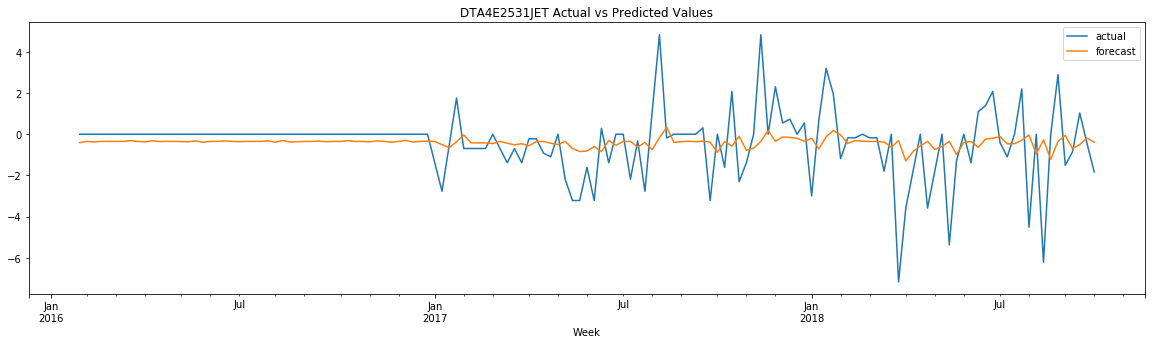

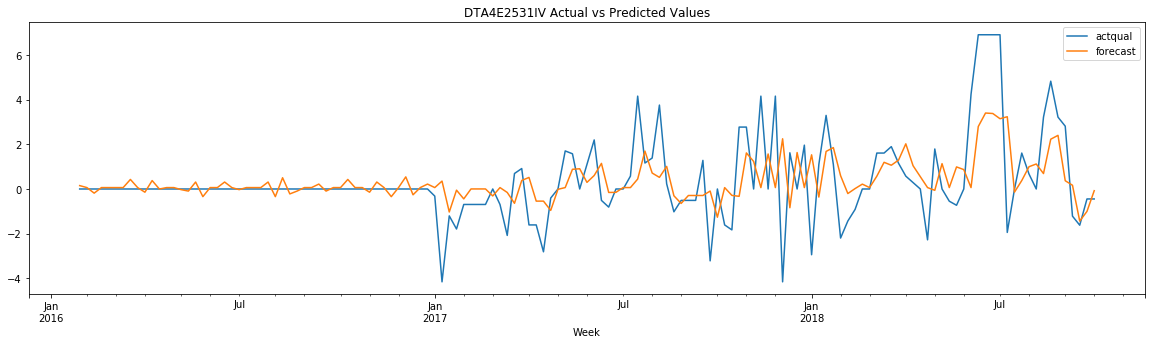

In [111]:
print(exog.shape)
print(endog.shape)
output = res2.predict()


DTA4E2531JET = pd.DataFrame({'actual':endog.DTA4E2531JET,'forecast':output.DTA4E2531JET})
DTA4E2531IV = pd.DataFrame({'actqual':endog.DTA4E2531IV,'forecast':output.DTA4E2531IV})
DTA4E2531JET.plot()
plt.title('DTA4E2531JET Actual vs Predicted Values')
DTA4E2531IV.plot()
plt.title('DTA4E2531IV Actual vs Predicted Values')

In [112]:
endog.index

DatetimeIndex(['2016-01-29', '2016-02-05', '2016-02-12', '2016-02-19',
               '2016-02-26', '2016-03-04', '2016-03-11', '2016-03-18',
               '2016-03-25', '2016-04-01',
               ...
               '2018-08-03', '2018-08-10', '2018-08-17', '2018-08-24',
               '2018-08-31', '2018-09-07', '2018-09-14', '2018-09-21',
               '2018-09-28', '2018-10-05'],
              dtype='datetime64[ns]', name='Week', length=141, freq='W-FRI')

In [151]:
predictions = []
mse         = []

for i in range(0, ret_train2.shape[0]-train_window):
    loc   = slice(i, i+train_window)  # slice object abstracting start:end:step into an slice object
    
    endog = ret_train2[endo_tickers].iloc[loc]
    exog  = ret_train2[exog_tickers].iloc[loc] if useExog else None
    new_model = VARMAX(endog=endog, exog = exog, order=order)


    with warnings.catch_warnings():
            warnings.filterwarnings("ignore", module='statsmodels')
            res2 = new_model.fit(start_params=res2.params, disp=False,
                                 maxiter=1000, method='lbfgs')
            predicted_value = res2.predict()
            
    mse.append(((endog-predicted_value)**2).mean(axis=0))
    exog2 = exog.iloc[[-1]] if useExog else None
    predictions.append(res2.forecast(1, exog = exog2))
    if i%10 == 0:
        print('Finish the %3d-th rolling 1-step-ahead forecast' %(i))

predictions = pd.concat(predictions) 
mse         = pd.concat(mse, axis=1)
print("Terminated!")

Finish the   0-th rolling 1-step-ahead forecast
Terminated!


In [148]:
predictions

,DTA4E2531JET,DTA4E2531IV
2018-08-03,-0.800632,-0.598019
2018-08-10,0.797606,0.682686
2018-08-17,0.069475,0.034359
2018-08-24,-0.024797,1.290320
2018-08-31,1.678651,0.131090
2018-09-07,-2.685852,-2.761956
2018-09-14,0.109344,0.636260
2018-09-21,1.029369,1.851762
2018-09-28,-1.100157,-2.432080
2018-10-05,1.997423,2.199210


In [149]:
mse

,0,1,2,3,4,5,6,7,8,9
Style_Color,,,,,,,,,,
DTA4E2531JET,3.604004,3.618254,3.622936,3.622968,3.667173,3.758598,3.768949,3.783874,3.786224,3.847799
DTA4E2531IV,3.228115,3.235502,3.239040,3.287097,3.299377,3.466474,3.471516,3.576277,3.610899,3.629428


In [152]:
np.sqrt(np.mean((DTA4E2531JET.actual-DTA4E2531JET.forecast)**2))

1.5906696397270341

In [157]:
np.sqrt(np.mean((DTA4E2531IV.actual-DTA4E2531IV.forecast)**2)) 

AttributeError: 'DataFrame' object has no attribute 'actual'

In [154]:
dates = predictions.index

In [155]:
true_values = ret_train2.loc[dates]
cake = pd.DataFrame({'actual':true_values.DTA4E2531JET, 'forecast':predictions.DTA4E2531JET})
spy  = pd.DataFrame({'actual':true_values.DTA4E2531IV, 'forecast':predictions.DTA4E2531IV})

Text(0,0.5,'weekly returns')

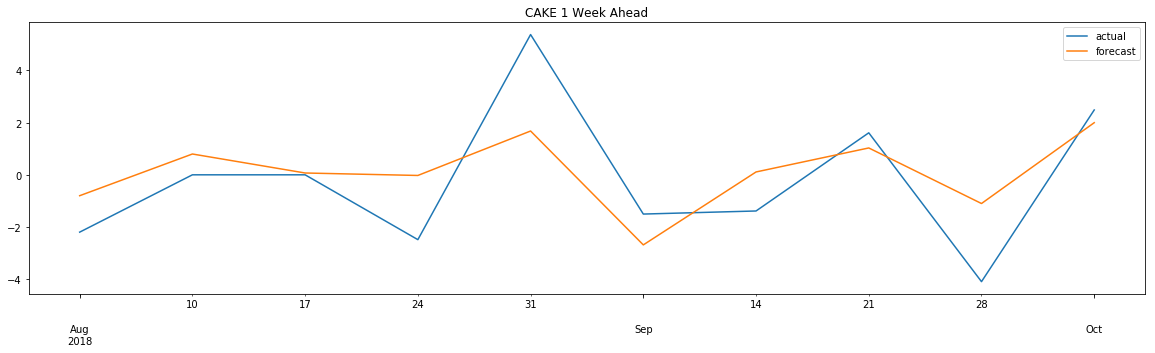

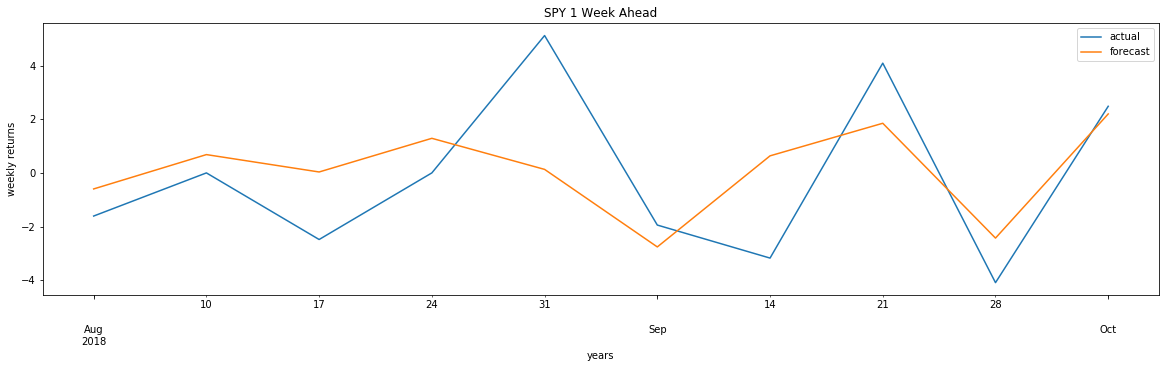

In [156]:
cake.plot()
plt.title('CAKE 1 Week Ahead')
spy.plot()
plt.title('SPY 1 Week Ahead')
plt.xlabel('years')
plt.ylabel('weekly returns')

In [ ]:
#For autoregressive integrated moving average (ARIMA) models, the rule of thumb is 
#that you should have at least 50 but preferably more than 100 observations (Box and Tiao 1975).